# Explore here

In [2]:
# Step 1: Loading the dataset
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep=",")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [4]:
# Step 2: Performing a full EDA
# Information about data types and non-null values
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Dropping duplicates
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [6]:
# Eliminating irrelevant information
data.drop(["COUNTY_NAME", "STATE_NAME", "fips", "0-9", "0-9 y/o % of total pop", "19-Oct", "10-19 y/o % of total pop", "20-29", "20-29 y/o % of total pop", "30-39", "30-39 y/o % of total pop", "40-49", "40-49 y/o % of total pop", "50-59", "50-59 y/o % of total pop", "60-69", "60-69 y/o % of total pop", "70-79", "70-79 y/o % of total pop", "80+","80+ y/o % of total pop", "White-alone pop", "% White-alone", "Black-alone pop", "% Black-alone", "Native American/American Indian-alone pop", "% NA/AI-alone", "Asian-alone pop", "% Asian-alone", "Hawaiian/Pacific Islander-alone pop", "% Hawaiian/PI-alone", "Two or more races pop", "% Two or more races", "county_pop2018_18 and older", "Total Population", "POP_ESTIMATE_2018", "CI90UBINC_2018", "CI90LBINC_2018"], axis = 1, inplace = True)
data.head()

,TOT_POP,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,57840,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


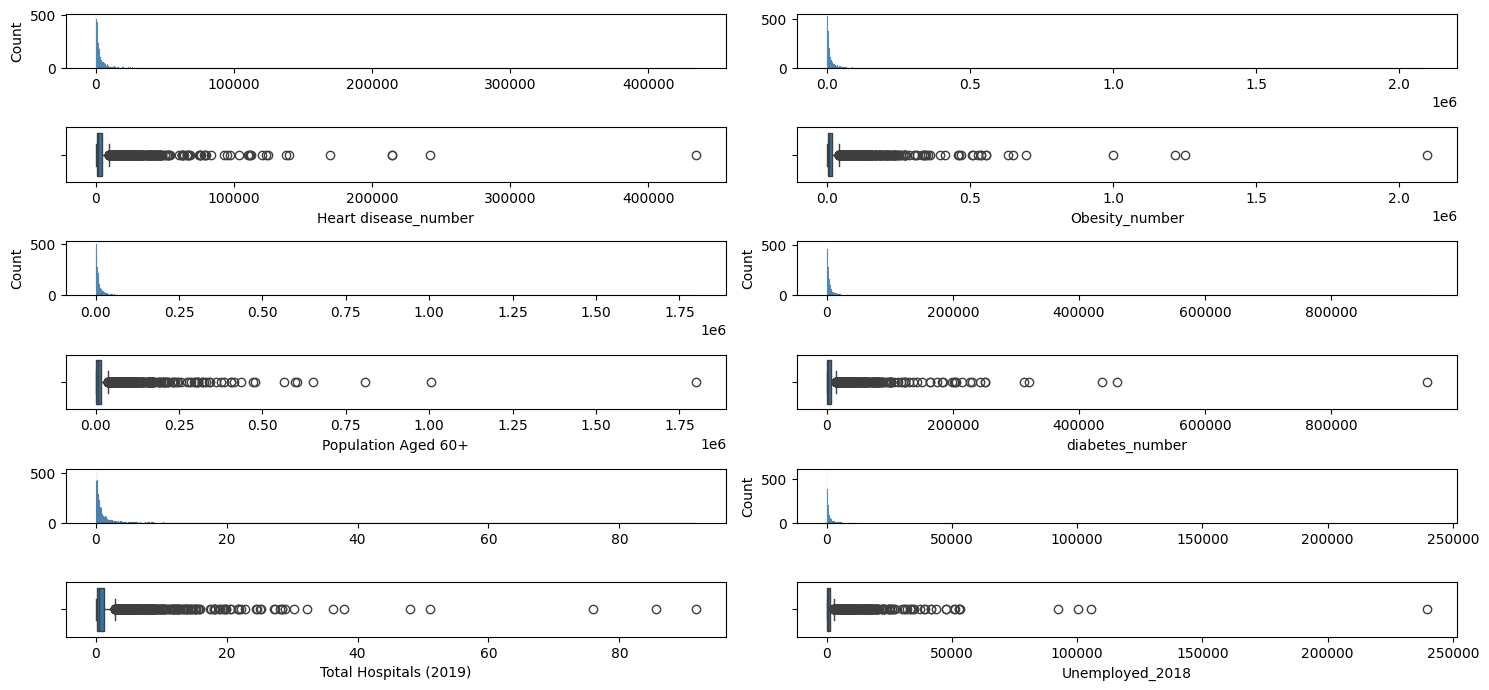

In [7]:
# Analysis of univariate (numeric) variables
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(6, 2, figsize = (15, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "Heart disease_number").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Heart disease_number")
sns.histplot(ax = axis[0, 1], data = data, x = "Obesity_number").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Obesity_number")
sns.histplot(ax = axis[2, 0], data = data, x = "Population Aged 60+").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "Population Aged 60+")
sns.histplot(ax = axis[2, 1], data = data, x = "diabetes_number").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "diabetes_number")
sns.histplot(ax = axis[4, 0], data = data, x = "Total Hospitals (2019)").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Total Hospitals (2019)")
sns.histplot(ax = axis[4, 1], data = data, x = "Unemployed_2018").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "Unemployed_2018")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

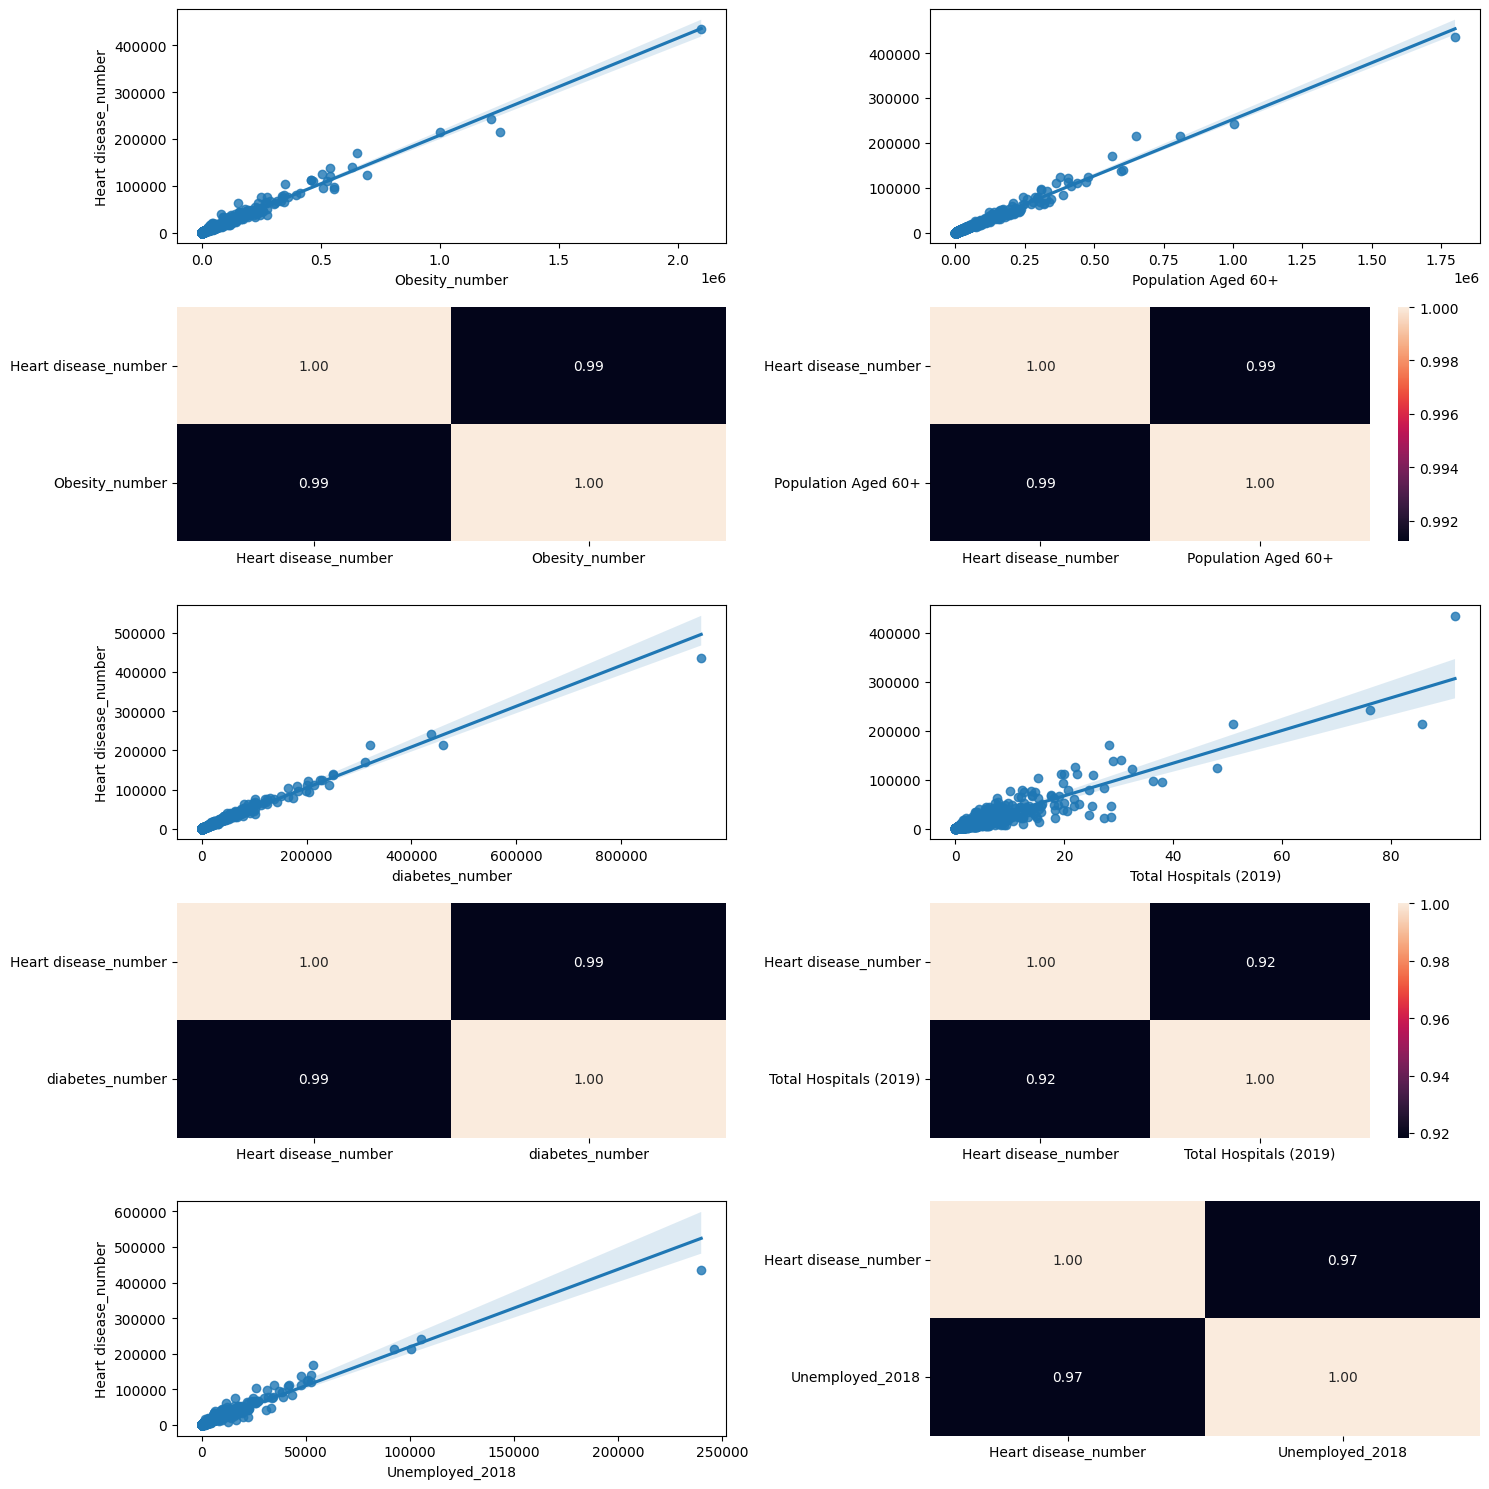

In [8]:
# Analysis of multivariate variables
# Numerical-numerical analysis
fig, axis = plt.subplots(5, 2, figsize = (15, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = data, x = "Obesity_number", y = "Heart disease_number")
sns.heatmap(data[["Heart disease_number", "Obesity_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "Population Aged 60+", y = "Heart disease_number").set(ylabel=None)
sns.heatmap(data[["Heart disease_number", "Population Aged 60+"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = data, x = "diabetes_number", y = "Heart disease_number")
sns.heatmap(data[["Heart disease_number", "diabetes_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = data, x = "Total Hospitals (2019)", y = "Heart disease_number").set(ylabel=None)
sns.heatmap(data[["Heart disease_number", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[4, 0], data = data, x = "Unemployed_2018", y = "Heart disease_number")
sns.heatmap(data[["Heart disease_number", "Unemployed_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

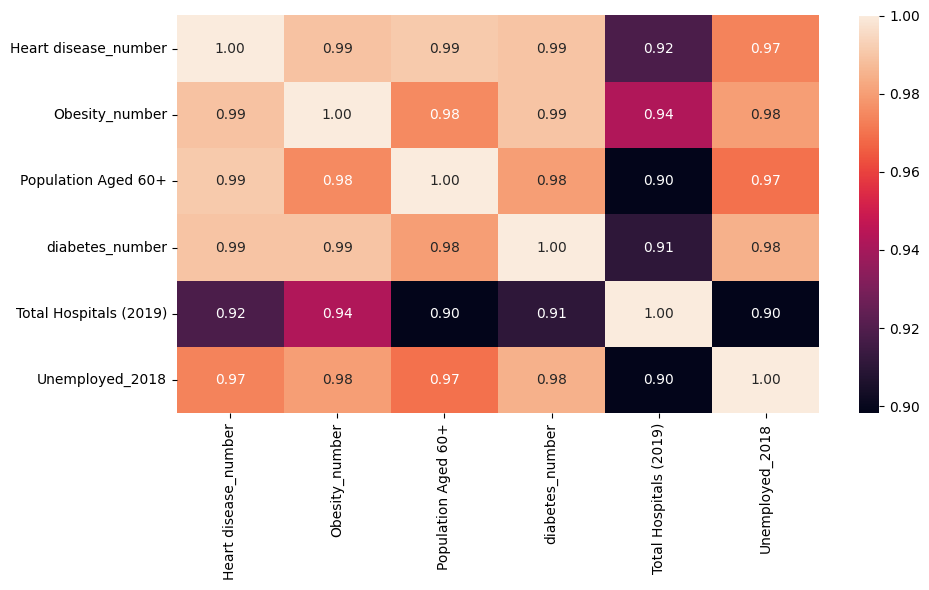

In [9]:
#Correlation analysis
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["Heart disease_number", "Obesity_number", "Population Aged 60+", "diabetes_number", "Total Hospitals (2019)", "Unemployed_2018"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Scaling the features
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data.drop(columns=["Heart disease_number"]))

# Creating a new DataFrame with the scaled features, maintaining the original column names
data_scal = pd.DataFrame(scal_features, index=data.index, columns=data.drop(columns=["Heart disease_number"]).columns)

# Adding the target column back to the DataFrame
data_scal["Heart disease_number"] = data["Heart disease_number"]

# Dividing the dataset into training and test samples
X = data_scal.drop("Heart disease_number", axis=1)
y = data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting the best features (independent variables)
k = int(len(X_train.columns) * 0.3)  # 30% of the total features
selection_model = SelectKBest(score_func=f_regression, k=k)
selection_model.fit(X_train, y_train)

# Geting the boolean array indicating selected features
ix = selection_model.get_support()

# Transforming the training and testing sets to retain only selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[ix])

X_train_sel.head()

,TOT_POP,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Population Aged 60+,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,0.002626,0.001740,0.004505,0.003185,0.001564,0.002888,0.002425,0.002389,0.003169,0.002983,0.004977,0.003449,0.004124,0.003594,0.003994,0.003535,0.003768,0.005315,0.002953,0.003230
1,0.005064,0.002676,0.013047,0.005041,0.003096,0.005349,0.004365,0.004354,0.004603,0.007112,0.011215,0.007262,0.007420,0.007129,0.008457,0.006687,0.006525,0.009422,0.005676,0.006103
2,0.003730,0.001831,0.007656,0.004042,0.001830,0.002823,0.003287,0.003318,0.002656,0.004944,0.002354,0.002592,0.004824,0.003266,0.004461,0.004950,0.004868,0.006416,0.003872,0.003651
3,0.009094,0.003286,0.014098,0.011861,0.006798,0.006284,0.008721,0.008845,0.006184,0.006694,0.014851,0.005378,0.013571,0.007236,0.010805,0.011475,0.012255,0.013152,0.008298,0.008895
4,0.013300,0.005558,0.023362,0.017033,0.008872,0.016039,0.012239,0.012298,0.011033,0.015095,0.025160,0.017454,0.020864,0.018186,0.017330,0.017278,0.018522,0.023026,0.013626,0.014666


In [11]:
X_test_sel.head()

,TOT_POP,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Population Aged 60+,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,0.000886,0.000804,0.001825,0.001030,0.000482,0.000830,0.000787,0.000800,0.000517,0.001200,0.001098,0.000781,0.001011,0.000823,0.001318,0.001196,0.001308,0.001675,0.001151,0.001220
1,0.026690,0.006947,0.028974,0.040065,0.026844,0.016757,0.023925,0.023930,0.023821,0.027608,0.033772,0.023481,0.040725,0.026504,0.032998,0.029710,0.030363,0.029479,0.022856,0.025122
2,0.001714,0.002151,0.003721,0.001709,0.000391,0.003743,0.000906,0.000890,0.001226,0.002896,0.001894,0.001339,0.001899,0.001668,0.002012,0.003022,0.002813,0.005257,0.002723,0.002486
3,0.011602,0.004980,0.020791,0.013094,0.008101,0.008820,0.012117,0.012296,0.008477,0.013169,0.021949,0.015226,0.018201,0.015865,0.013714,0.012801,0.012963,0.018357,0.009888,0.011087
4,0.022324,0.007531,0.023486,0.027918,0.022203,0.023243,0.021741,0.021725,0.022078,0.023092,0.028249,0.019640,0.034064,0.022168,0.026288,0.020906,0.021737,0.025346,0.017799,0.021244


In [12]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [13]:
# Building a multiple linear regression model
# Reading the processed dataset
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),...,Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Population Aged 60+,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,0.002626,0.001740,0.004505,0.003185,0.001564,0.002888,0.002425,0.002389,0.003169,0.002983,...,0.003449,0.004124,0.003594,0.003994,0.003535,0.003768,0.005315,0.002953,0.003230,2072
1,0.005064,0.002676,0.013047,0.005041,0.003096,0.005349,0.004365,0.004354,0.004603,0.007112,...,0.007262,0.007420,0.007129,0.008457,0.006687,0.006525,0.009422,0.005676,0.006103,3796
2,0.003730,0.001831,0.007656,0.004042,0.001830,0.002823,0.003287,0.003318,0.002656,0.004944,...,0.002592,0.004824,0.003266,0.004461,0.004950,0.004868,0.006416,0.003872,0.003651,2222
3,0.009094,0.003286,0.014098,0.011861,0.006798,0.006284,0.008721,0.008845,0.006184,0.006694,...,0.005378,0.013571,0.007236,0.010805,0.011475,0.012255,0.013152,0.008298,0.008895,5484
4,0.013300,0.005558,0.023362,0.017033,0.008872,0.016039,0.012239,0.012298,0.011033,0.015095,...,0.017454,0.020864,0.018186,0.017330,0.017278,0.018522,0.023026,0.013626,0.014666,8686


In [14]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [15]:
# Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3, ...): {model.coef_}")

Intercept (a): 18.904138908490495
Coefficients (b1, b2, b3, ...): [ 71695.41994444 -73154.26563689 -13600.70034606 -86209.92788989
 -48814.55106416   8928.36795944  20290.80251266  23592.73625609
 -47123.72282802  -4429.63672314  10623.34762337 -59924.79571928
 -31364.98508099  37328.37585368 163991.08781255  16910.74039884
  44728.18359573 144154.47106025  45650.59123903 216172.21731682]


In [17]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([7.15365790e+02, 1.28796514e+04, 1.63862163e+03, 6.71791094e+03,
       1.08545744e+04, 1.50348990e+03, 7.29541549e+02, 1.29791708e+03,
       3.64322144e+02, 8.41072706e+02, 1.31016031e+03, 2.02433037e+02,
       4.50262454e+03, 1.37238753e+03, 9.21120822e+03, 2.59647585e+03,
       5.32080561e+04, 1.20326891e+03, 2.00586314e+03, 4.13406717e+02,
       1.51947639e+03, 6.95542117e+02, 8.29261685e+02, 5.97543560e+02,
       9.66406039e+04, 2.43589102e+03, 8.58043682e+02, 2.06669229e+03,
       8.67735283e+02, 2.01258690e+02, 1.18735165e+03, 1.89491599e+03,
       2.66135058e+03, 3.13957808e+03, 8.31745172e+03, 1.52952934e+03,
       2.64389401e+03, 1.19672956e+03, 8.39678851e+02, 1.69236445e+03,
       1.39758400e+03, 8.64120052e+03, 3.64413465e+02, 1.33292847e+02,
       2.66232541e+03, 6.85244956e+02, 3.40274382e+02, 7.49863131e+03,
       1.06389812e+03, 7.24892375e+02, 1.84492653e+04, 3.30498469e+02,
       1.34004561e+03, 5.40966868e+02, 8.57877173e+03, 7.93272277e+02,
      

In [18]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 306214.3466914953
Coefficient of determination: 0.9965014261305642


In [20]:
# Defining the Lasso and the Ridge regression models
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f"Ridge Mean Squared Error: {ridge_mse:.2f}")
print(f"Lasso Mean Squared Error: {lasso_mse:.2f}")

Ridge Mean Squared Error: 4116076.33
Lasso Mean Squared Error: 313428.80


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.847e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


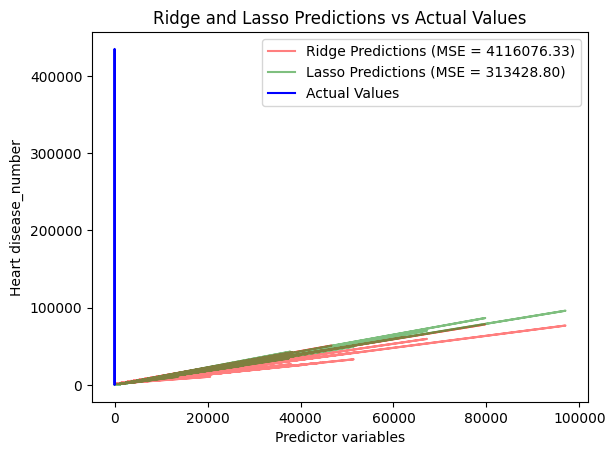

In [22]:
# Model visualization
import matplotlib.pyplot as plt

plt.plot(y_test, ridge_predictions, color='red', alpha=0.5, label=f'Ridge Predictions (MSE = {ridge_mse:.2f})')
plt.plot(y_test, lasso_predictions, color='green', alpha=0.5, label=f'Lasso Predictions (MSE = {lasso_mse:.2f})')
plt.plot(X["Unemployed_2018"], y, color='blue', label='Actual Values') 

plt.title('Ridge and Lasso Predictions vs Actual Values')
plt.xlabel('Predictor variables')
plt.ylabel('Heart disease_number')
plt.legend()
plt.show()

In [23]:
from pickle import dump

dump(lasso, open("../models/lasso_alpha-0.1.sav", "wb"))